Modules

In [1]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from cenpy import products
import matplotlib.pyplot as plt

Set Up

In [2]:
# Define product
acs = products.ACS(2019)

**View a new census table**
https://api.census.gov/data/2019/acs/acs5/variables.html

In [3]:
# Download data
    # the v list is a list of the names of variables you want to input that then goes into the data pull
    # the level is 
v = []
counter = 1
while counter < 10:
    col = 'B08012_00'+str(counter)+'E'
    v.append(col)
    counter += 1

while counter < 40:
    col = 'B08012_0'+str(counter)+'E'
    v.append(col)
    counter += 1
    
v.append('B08013_001E')
v.append('B08013_002E')
v.append('B08013_003E')

In [4]:
new_table = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=v)

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [5]:
# Calculate stats for the new data for a given column
new_table.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   GEOID        14 non-null     object  
 1   geometry     14 non-null     geometry
 2   B08012_001E  14 non-null     float64 
 3   B08012_002E  14 non-null     float64 
 4   B08012_003E  14 non-null     float64 
 5   B08012_004E  14 non-null     float64 
 6   B08012_005E  14 non-null     float64 
 7   B08012_006E  14 non-null     float64 
 8   B08012_007E  14 non-null     float64 
 9   B08012_008E  14 non-null     float64 
 10  B08012_009E  14 non-null     float64 
 11  B08012_010E  14 non-null     float64 
 12  B08012_011E  14 non-null     float64 
 13  B08012_012E  14 non-null     float64 
 14  B08012_013E  14 non-null     float64 
 15  B08012_014E  14 non-null     float64 
 16  B08012_015E  14 non-null     float64 
 17  B08012_016E  14 non-null     float64 
 18  B08012_017E  14 non-null

In [6]:
new_table['B08013_002E'].sum()

343800.0

In [7]:
new_table['B08013_003E'].sum()

253860.0

*Important Data*: men have 343800 aggregate travel hours, as opposed to women's 253860.

<AxesSubplot:>

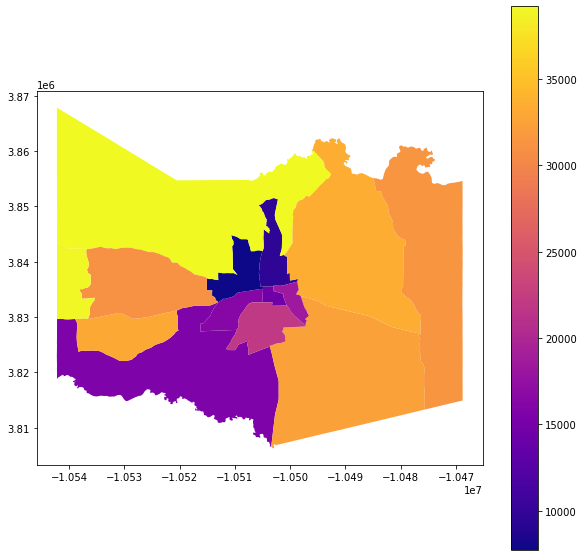

In [8]:
# Plot map of a given column
f, ax = plt.subplots(1, 1, figsize=(10,10))
new_table.plot('B08013_002E', ax=ax, cmap='plasma', legend=True)

<AxesSubplot:>

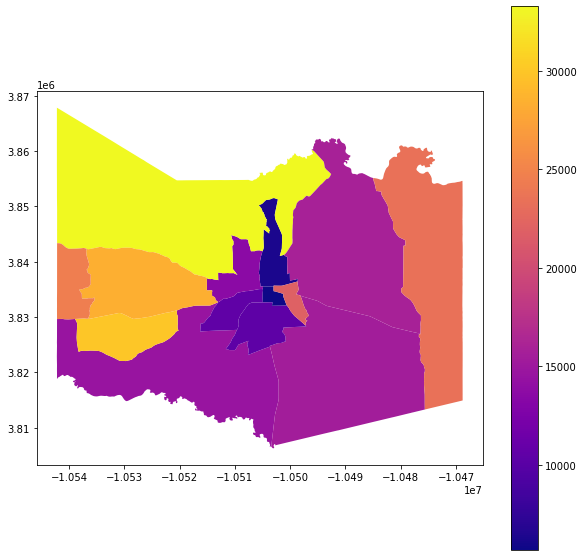

In [9]:
# Plot map of a given column
f, ax = plt.subplots(1, 1, figsize=(10,10))
new_table.plot('B08013_003E', ax=ax, cmap='plasma', legend=True)

Columns of note:
B08012_001E = Total number of people polled per tract
B08012_014E = Total number of men per tract
B08012_027E = Total number of women per tract
B08012_012E + B08012_013E = Total numer of workers with a travel time > 60 minutes
B08012_025E + B08012_026E = Total numer of men with a travel time > 60 minutes
B08012_038E + B08012_039E = Total numer of women with a travel time > 60 minutes
B08013_001E = Aggregate travel hours
B08013_002E = Men's aggregate travel hours
B08013_003E = Men's aggregate travel hours

**Gather relevant information**

Base Variables:

In [10]:
base = pd.DataFrame()

def get_popmedian(gdf):
    infodict = {}
    
    for row in gdf.iterrows():
        pc = ['B08012_002E', 'B08012_003E', 'B08012_004E', 'B08012_005E', 'B08012_006E', 'B08012_007E', 'B08012_008E', 'B08012_009E', 'B08012_010E', 'B08012_011E', 'B08012_012E', 'B08012_013E']
        people = int(row[1][2])
        hpeople = people // 2
        currcol = ''
        
        while hpeople > 0:
            currcol = pc.pop(0)
            value = new_table[currcol][row[0]]
            hpeople = hpeople - value # subtract the number of people in that category from the total
            
        infodict[row[1][47]] = currcol
        
    return infodict

def get_menmedian(gdf):
    infodict = {}
    
    for row in gdf.iterrows():
        pc = ['B08012_015E', 'B08012_016E', 'B08012_017E', 'B08012_018E', 'B08012_019E', 'B08012_020E', 'B08012_021E', 'B08012_022E', 'B08012_023E', 'B08012_024E', 'B08012_025E', 'B08012_026E']
        men = int(row[1][15])
        hmen = men // 2
        currcol = ''
        #print('new row', currcol)
        
        while hmen > 0:
            currcol = pc.pop(0)
            value = new_table[currcol][row[0]]
            hmen = hmen - value # subtract the number of people in that category from the total
            
        #print('end while', currcol)
        infodict[row[1][47]] = currcol
        
    return infodict


def get_womenmedian(gdf):
    infodict = {}
    
    for row in gdf.iterrows():
        pc = ['B08012_028E', 'B08012_029E', 'B08012_030E', 'B08012_031E', 'B08012_032E', 'B08012_033E', 'B08012_034E', 'B08012_035E', 'B08012_036E', 'B08012_037E', 'B08012_038E', 'B08012_039E']
        women = int(row[1][28])
        hwomen = women // 2
        currcol = ''
        #print('new row', currcol)
        
        while hwomen > 0:
            #print('while   half women =', hwomen)
            currcol = pc.pop(0)
            value = new_table[currcol][row[0]]
            hwomen = hwomen - value # subtract the number of people in that category from the total
            
        #print('end while', currcol)
        infodict[row[1][47]] = currcol
        
    return infodict

B08012_004 = 10-14
B08012_005 = 15-19
B08012_006 = 20-24
B08012_007 = 25-29
B08012_008 = 30-34

In [11]:
population_median_cols = get_popmedian(new_table)
population_median = ['15-19', '15-19', '10-14', '15-19', '20-24', '10-14', '20-24', '25-29', '10-14', '20-24', '25-29', '30-34', '10-14', '20-24']
population_median_cols

{'020604': 'B08012_005E',
 '020402': 'B08012_005E',
 '020501': 'B08012_004E',
 '020302': 'B08012_005E',
 '020603': 'B08012_006E',
 '020401': 'B08012_004E',
 '020103': 'B08012_006E',
 '020200': 'B08012_007E',
 '020502': 'B08012_004E',
 '020605': 'B08012_006E',
 '020104': 'B08012_007E',
 '020102': 'B08012_008E',
 '020301': 'B08012_004E',
 '020606': 'B08012_006E'}

B08012_017 = 10-14
B08012_018 = 15-19
B08012_019 = 20-24
B08012_020 = 25-29
B08012_021 = 30-35

In [12]:
men_median_cols = get_menmedian(new_table)
men_median = ['15-19', '15-19', '15-19', '15-19', '20-24', '10-14', '25-29', '25-29', '15-19', '20-24', '30-34', '30-34', '10-14', '20-24']
men_median_cols

{'020604': 'B08012_018E',
 '020402': 'B08012_018E',
 '020501': 'B08012_018E',
 '020302': 'B08012_018E',
 '020603': 'B08012_019E',
 '020401': 'B08012_017E',
 '020103': 'B08012_020E',
 '020200': 'B08012_020E',
 '020502': 'B08012_018E',
 '020605': 'B08012_019E',
 '020104': 'B08012_021E',
 '020102': 'B08012_021E',
 '020301': 'B08012_017E',
 '020606': 'B08012_019E'}

B08012_029 = 5-9
B08012_030 = 10-14
B08012_031 = 15-19
B08012_032 = 20-24
B08012_033 = 25-29
B08012_034 = 30-34

In [13]:
women_median_cols = get_womenmedian(new_table)
women_median = ['15-19', '10-14', '5-9', '15-19', '20-24', '10-14', '15-19', '25-29', '10-14', '20-24', '20-24', '30-34', '10-14', '20-24']
women_median_cols

{'020604': 'B08012_031E',
 '020402': 'B08012_030E',
 '020501': 'B08012_029E',
 '020302': 'B08012_031E',
 '020603': 'B08012_032E',
 '020401': 'B08012_030E',
 '020103': 'B08012_031E',
 '020200': 'B08012_033E',
 '020502': 'B08012_030E',
 '020605': 'B08012_032E',
 '020104': 'B08012_032E',
 '020102': 'B08012_034E',
 '020301': 'B08012_030E',
 '020606': 'B08012_032E'}

In [14]:
# Adding columns to model table
base['GEOID'] = new_table['GEOID']
base['geometry'] = new_table['geometry']
base['NAME'] = new_table['NAME']
base['state'] = new_table['state']
base['county'] = new_table['county']
base['tract'] = new_table['tract']
base['population_median'] = population_median
base['men_median'] = men_median
base['women_median'] = women_median

In [15]:
# people that have a wage or salary income
salary = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=['B19052_001E', 'B19052_002E'])
p_salary = (salary['B19052_002E']/salary['B19052_001E'])
base['p_salary'] = p_salary
base['B19052_002E'] = salary['B19052_002E']

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [16]:
# percentage of people with internet access
internet = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=['B28002_002E', 'B28002_001E'])
p_has_internet = internet['B28002_002E'] / internet['B28002_001E']
base['p_has_internet'] = p_has_internet

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [17]:
# percentage of black people B01001B_001E
pop = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=['B01001B_001E', 'B01001_001E'])
p_black = pop['B01001B_001E'] / pop['B01001_001E']
base['p_black'] = p_black

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [18]:
# median total earnings B20002_001E
earnings = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=['B20002_001E'])
base['med_total_earnings'] = earnings['B20002_001E']

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [19]:
# total B08124_001E
# percent drove alone to work B08124_008E
# percent drove carpooled B08124_015E
# percent public transportation B08124_022E
# percent walked B08124_029E
# percent bicycle/motorcycle/taxi/other B08124_036E
# percent worked from home B08124_043E
transportation = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=['B08124_001E', 'B08124_008E', 'B08124_015E', 'B08124_022E', 'B08124_029E', 'B08124_036E', 'B08124_043E'])

p_drovealone = transportation['B08124_008E'] / transportation['B08124_001E']
p_carpool = transportation['B08124_015E'] / transportation['B08124_001E']
p_publictrans = transportation['B08124_022E'] / transportation['B08124_001E']
p_walked = transportation['B08124_029E'] / transportation['B08124_001E']
p_bikemotorother = transportation['B08124_036E'] / transportation['B08124_001E']
p_workfromhome = transportation['B08124_043E'] / transportation['B08124_001E']

base['p_drovealone'] = p_drovealone
base['p_carpool'] = p_carpool
base['p_publictrans'] = p_publictrans
base['p_walked'] = p_walked
base['p_bikemotorother'] = p_bikemotorother
base['p_workfromhome'] = p_workfromhome

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [20]:
# percent with health insurance 26-64
insurance = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=['B27019_001E', 'B27019_004E', 'B27019_009E', 'B27019_014E', 'B27019_019E'])
p_healthinsurance = (insurance['B27019_004E'] + insurance['B27019_009E'] + insurance['B27019_014E'] + insurance['B27019_019E']) / insurance['B27019_001E']
base['p_healthinsurance'] = p_healthinsurance

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [21]:
transportation['B08124_022E']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
Name: B08124_022E, dtype: float64

In [22]:
pm_int = []
for item in population_median:
    if item == '5-9':
        pm_int.append(7)
        
    elif item == '10-14':
        pm_int.append(12)
        
    elif item == '15-19':
        pm_int.append(17)
        
    elif item == '20-24':
        pm_int.append(22)
        
    elif item == '25-29':
        pm_int.append(27)
        
    elif item == '30-34':
        pm_int.append(32)
        
base['pm_int'] = pm_int

In [23]:
wm_int = []
for item in women_median:
    if item == '5-9':
        wm_int.append(7)
        
    elif item == '10-14':
        wm_int.append(12)
        
    elif item == '15-19':
        wm_int.append(17)
        
    elif item == '20-24':
        wm_int.append(22)
        
    elif item == '25-29':
        wm_int.append(27)
        
    elif item == '30-34':
        wm_int.append(32)
        
base['wm_int'] = wm_int

In [24]:
mm_int = []
for item in men_median:
    if item == '5-9':
        mm_int.append(7)
        
    elif item == '10-14':
        mm_int.append(12)
        
    elif item == '15-19':
        mm_int.append(17)
        
    elif item == '20-24':
        mm_int.append(22)
        
    elif item == '25-29':
        mm_int.append(27)
        
    elif item == '30-34':
        mm_int.append(32)
        
    else:
        mm_int.append('problem')
        
base['mm_int'] = mm_int

In [73]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   GEOID               14 non-null     object  
 1   geometry            14 non-null     geometry
 2   NAME                14 non-null     object  
 3   state               14 non-null     object  
 4   county              14 non-null     object  
 5   tract               14 non-null     object  
 6   population_median   14 non-null     object  
 7   men_median          14 non-null     object  
 8   women_median        14 non-null     object  
 9   p_salary            14 non-null     float64 
 10  B19052_002E         14 non-null     float64 
 11  p_has_internet      14 non-null     float64 
 12  p_black             14 non-null     float64 
 13  med_total_earnings  14 non-null     float64 
 14  p_drovealone        14 non-null     float64 
 15  p_carpool           14 non-null     float6

In [25]:
# Compute correlation matrix
corr_matrix = base.corr()

# Display just house value correlations
#corr_matrix['population_median'].sort_values(ascending = False)

In [26]:
corr_matrix['pm_int'].sort_values(ascending = False)

pm_int                1.000000
wm_int                0.939520
mm_int                0.935032
p_carpool             0.365044
B19052_002E           0.320370
p_has_internet        0.263626
p_healthinsurance     0.248170
med_total_earnings    0.240417
p_drovealone         -0.045760
p_salary             -0.056781
p_walked             -0.202142
p_workfromhome       -0.234144
p_bikemotorother     -0.235797
p_black              -0.396460
p_publictrans              NaN
Name: pm_int, dtype: float64

In [111]:
corr_matrix

,pm_int,wm_int,mm_int,p_has_internet,p_salary,B19052_002E,p_black,med_total_earnings,p_drovealone,p_carpool,p_publictrans,p_walked,p_bikemotorother,p_workfromhome,p_healthinsurance
pm_int,1.000000,0.939520,0.935032,0.263626,-0.056781,0.320370,-0.396460,0.240417,-0.045760,0.365044,NaN,-0.202142,-0.235797,-0.234144,0.248170
wm_int,0.939520,1.000000,0.798898,0.387064,-0.082084,0.433936,-0.508800,0.258892,-0.120626,0.386969,NaN,-0.132188,-0.173689,-0.211461,0.311710
mm_int,0.935032,0.798898,1.000000,0.227523,-0.070714,0.165731,-0.399368,0.263632,-0.038123,0.400102,NaN,-0.307569,-0.163685,-0.299316,0.128535
p_has_internet,0.263626,0.387064,0.227523,1.000000,0.617957,0.735020,-0.786264,0.769319,0.238931,0.156718,NaN,0.045473,-0.178152,-0.484293,0.455018
p_salary,-0.056781,-0.082084,-0.070714,0.617957,1.000000,0.581285,-0.336662,0.523761,0.428127,-0.284643,NaN,0.151441,-0.258834,-0.147793,0.415393
B19052_002E,0.320370,0.433936,0.165731,0.735020,0.581285,1.000000,-0.543636,0.656873,0.402737,-0.039228,NaN,0.323343,-0.254785,-0.506700,0.621043
p_black,-0.396460,-0.508800,-0.399368,-0.786264,-0.336662,-0.543636,1.000000,-0.776092,-0.101133,-0.249116,NaN,0.426159,0.207486,0.234248,-0.324221
med_total_earnings,0.240417,0.258892,0.263632,0.769319,0.523761,0.656873,-0.776092,1.000000,0.469803,0.112476,NaN,-0.268915,-0.520046,-0.469002,0.421512
p_drovealone,-0.045760,-0.120626,-0.038123,0.238931,0.428127,0.402737,-0.101133,0.469803,1.000000,-0.679211,NaN,0.116340,-0.647335,-0.222742,0.304140
p_carpool,0.365044,0.386969,0.400102,0.156718,-0.284643,-0.039228,-0.249116,0.112476,-0.679211,1.000000,NaN,-0.235007,0.237530,-0.423556,-0.185822


In [38]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from shapely.geometry import Point

In [39]:
# Define feature list
feature_list =  ['p_carpool', 'B19052_002E', 'p_has_internet', 'p_healthinsurance', 'med_total_earnings', 'p_drovealone', 'p_salary', 'p_walked', 'p_workfromhome', 'p_bikemotorother', 'p_black', 'p_publictrans']

# Define features and labels 
X = base[feature_list]
y = base['pm_int']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [54]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [60]:
# Define model
forest_reg = RandomForestRegressor(n_estimators = 25)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25)

In [61]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

9.227495145848989

# VISUALIZATIONS

(0.0, 80.0)

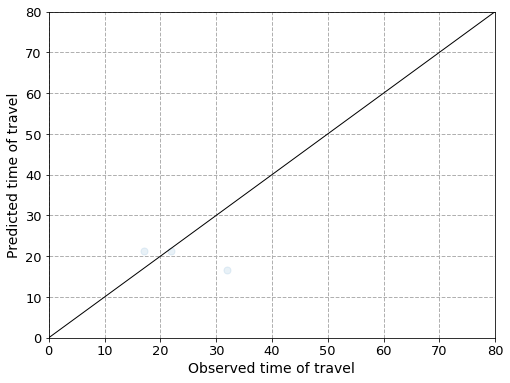

In [72]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1, s=50, zorder=2)
ax.plot([0, 80], [0, 80], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted time of travel', fontsize=14)
ax.set_xlabel('Observed time of travel', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,80)
ax.set_xlim(0,80)

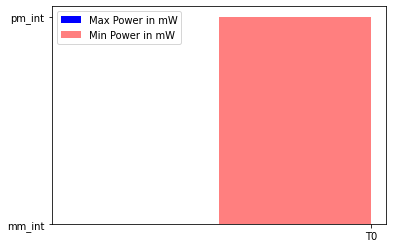

In [76]:


width = 0.8

highPower   = ['mm_int']
lowPower    = ['pm_int']
indices = np.arange(len(highPower))

plt.bar(indices, highPower, width=width, 
        color='b', label='Max Power in mW')
plt.bar([i+0.25*width for i in indices], lowPower, 
        width=0.5*width, color='r', alpha=0.5, label='Min Power in mW')

plt.xticks(indices+width/2., 
           ['T{}'.format(i) for i in range(len(highPower))] )

plt.legend()

plt.show()